<a href="https://colab.research.google.com/github/ratimayy/deep/blob/main/CNN2_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare the environment

In [ ]:
# List all NVIDIA GPUs as available in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-2f07e386-9a76-876f-3ecd-c02b086ed4d3)


In [ ]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]

NumPy 1.26.4

Matplotlib 3.7.1

TensorFlow 2.17.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


# 2. Load the pretrained model

In [ ]:
# Load the ImageNet VGG-16 model, including both the feature extractor part and the classifier part
# By default, VGG-16 is designed for an input image of dimension 224x224x3
vgg = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)

vgg.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# 3. Use the pretrained model

In [ ]:
# Load a test image from Internet
!wget "https://www.dogbreedinfo.com/images21/Pomeranianommania%20PoetryInMotionandPommaniaMsDynamite.jpg"

--2024-09-11 12:07:20--  https://www.dogbreedinfo.com/images21/Pomeranianommania%20PoetryInMotionandPommaniaMsDynamite.jpg
Resolving www.dogbreedinfo.com (www.dogbreedinfo.com)... 192.124.249.54
Connecting to www.dogbreedinfo.com (www.dogbreedinfo.com)|192.124.249.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50309 (49K) [image/jpeg]
Saving to: ‘Pomeranianommania PoetryInMotionandPommaniaMsDynamite.jpg’

Pomeranianommania P 100%[===================>]  49.13K  --.-KB/s    in 0.001s  

2024-09-11 12:07:21 (32.9 MB/s) - ‘Pomeranianommania PoetryInMotionandPommaniaMsDynamite.jpg’ saved [50309/50309]



In [ ]:
!ls

'Pomeranianommania PoetryInMotionandPommaniaMsDynamite.jpg'   sample_data


type(img) = <class 'PIL.Image.Image'>
type(x) = <class 'numpy.ndarray'> , x.dtype = float32 , x.shape = (224, 224, 3) , min(x) = 0.0 , max(x) = 255.0


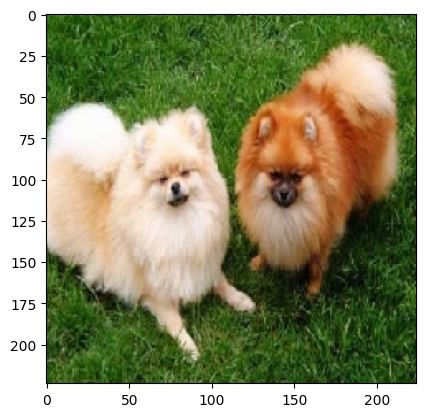

In [ ]:
# Load an image as PIL.Image.Image
img_path = 'Pomeranianommania PoetryInMotionandPommaniaMsDynamite.jpg'
img =  tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
print( f"type(img) = {type(img)}" )

# Convert PIL Image to NumPy ndarray
x = tf.keras.preprocessing.image.img_to_array(img)
print( f"type(x) = {type(x)} , x.dtype = {x.dtype} , x.shape = {x.shape} , min(x) = {np.min(x)} , max(x) = {np.max(x)}" )

# Display the NumPy image
plt.imshow( x.astype(np.uint8) )
plt.show()

In [ ]:
# Preprocess the image following requirements of VGG-16
x = tf.keras.applications.vgg16.preprocess_input(x)

print( f"type(x) = {type(x)} , x.dtype = {x.dtype} , x.shape = {x.shape} , min(x) = {np.min(x):.4f} , max(x) = {np.max(x):.4f}" )

type(x) = <class 'numpy.ndarray'> , x.dtype = float32 , x.shape = (224, 224, 3) , min(x) = -123.6800 , max(x) = 151.0610


In [ ]:
# Use the model to predict this image
pred = vgg.predict( np.expand_dims(x, axis=0) )

# Decode the top 10 classes
predictions = tf.keras.applications.vgg16.decode_predictions(pred, top=10)[0]
for i, prediction in enumerate(predictions):
  print( f"Rank {i+1}: {prediction}" )

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Rank 1: ('n02112018', 'Pomeranian', 0.9658979)
Rank 2: ('n02112137', 'chow', 0.018007733)
Rank 3: ('n02112350', 'keeshond', 0.006567225)
Rank 4: ('n02086079', 'Pekinese', 0.0060421694)
Rank 5: ('n02098413', 'Lhasa', 0.0010278571)
Rank 6: ('n02085782', 'Japanese_spaniel', 0.00059659954)
Rank 7: ('n02097474', 'Tibetan_terrier', 0.00022166413)
Rank 8: ('n02096294', 'Australian_terrier', 0.00016916747)
Rank 9: ('n02086910', 'papillon', 0.00014627469)
Rank 10: ('n02094433', 'Yorkshire_terrier', 0.00012231969)
